# Jugando con los números primos

Vamos a intentar diseñar una calculadora de primos. Por consenso, el 1 no es un número primo, por lo que los primos comienzan por 2

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.animation as animation

def primo(n):
    """
    Función que determina si un número es primo o no. Un número primo es aquel que solo puede dividirse entre sí mismo
    y entre 1 para que el resto dé como resultado 0. 

    Parámetros:
    n: int. Número a evaluar, introducido por el usuario.

    Return:
    Se nos devuelve un texto que indica si el número es primo o no.
    """
    if n < 2:
        return print(f"El número {n} no es un número adecuado.")
    for i in range(2, n):
        if n % i == 0:
            return print(f"El número {n} no es primo.")
    return print(f"El número {n} es primo.")

primo(int(input("Ingrese un número superior a 1: ")))


El número 103 es primo.


In [50]:
n_primos = []
num = int(input("Ingrese un número: "))
for i in range(2, num+1):
    if all(i % p != 0 for p in n_primos):
        n_primos.append(i)

print(f"Hay un total de {len(n_primos)} números primos entre 1 y {num}, que son:\n {n_primos}")

Hay un total de 168 números primos entre 1 y 1000, que son:
 [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997]


In [51]:
serie_primos = pd.Series(n_primos)

diff = serie_primos.diff()

diff

0      NaN
1      1.0
2      2.0
3      2.0
4      4.0
      ... 
163    4.0
164    6.0
165    6.0
166    8.0
167    6.0
Length: 168, dtype: float64

In [52]:
diff.mean()

5.958083832335329

In [53]:
diff.std()

3.557366857211275

<Axes: title={'center': 'Diferencia entre números primos'}, xlabel='Número primo', ylabel='Diferencia con el número primo anterior'>

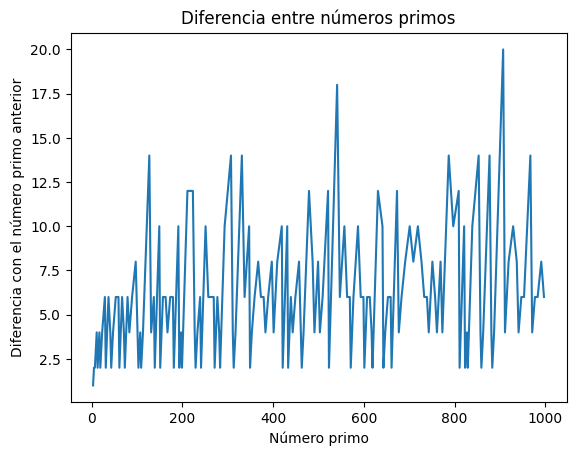

In [54]:
fig = sns.lineplot(x=serie_primos, y=diff)
fig.set_title("Diferencia entre números primos")
fig.set_xlabel("Número primo")
fig.set_ylabel("Diferencia con el número primo anterior")
fig

In [55]:
fig2 = px.line(x=serie_primos, y=diff, title="Diferencia entre números primos", labels={"x": "Número primo", "y": "Diferencia con el número primo anterior"})
fig2.add_hline(y=diff.mean(), line_dash="dot", line_color="red")
fig2.add_hline(y=diff.mean() + diff.std(), line_dash="dash", line_color="green")
fig2.add_hline(y=diff.mean() - diff.std(), line_dash="dash", line_color="black")
fig2.update_yaxes(title_text="Diferencia con el número primo anterior")
fig2.update_xaxes(title_text="Número primo")

# Supuestamente, la mayoría de números primos deberían aumentar de manera más o menos constante, dentro del intervalo de 
# la media +-1 desviación estándar.

Vamos a ver qué pasa con los últimos dígitos de los números.

In [56]:
# Creamos las listas vacías donde vamos a añadir los números primos que terminan en 1, 3, 7 y 9 (no tenemos en cuenta los números que terminan en 
# 0, 2, 4, 5, 6 y 8 porque no pueden ser primos, ya que son múltiplos de 2 y/o 5). Los únicos primos que terminan en 2 o 5 son, precisamente, el 2 y el 5.
unos = []
treses = []
sietes = []
nueves = []

for i in range(len(n_primos)):
    if str(n_primos[i])[-1] == "1":
        unos.append(n_primos[i])
    elif str(n_primos[i])[-1] == "3":
        treses.append(n_primos[i])
    elif str(n_primos[i])[-1] == "7":
        sietes.append(n_primos[i])
    elif str(n_primos[i])[-1] == "9":
        nueves.append(n_primos[i])

print(f"Hay un total de {len(unos)} números que terminan en 1, que son: {unos}")
print(f"Hay un total de {len(treses)} números que terminan en 3, que son: {treses}")
print(f"Hay un total de {len(sietes)} números que terminan en 7, que son: {sietes}")
print(f"Hay un total de {len(nueves)} números que terminan en 9, que son: {nueves}")

Hay un total de 40 números que terminan en 1, que son: [11, 31, 41, 61, 71, 101, 131, 151, 181, 191, 211, 241, 251, 271, 281, 311, 331, 401, 421, 431, 461, 491, 521, 541, 571, 601, 631, 641, 661, 691, 701, 751, 761, 811, 821, 881, 911, 941, 971, 991]
Hay un total de 42 números que terminan en 3, que son: [3, 13, 23, 43, 53, 73, 83, 103, 113, 163, 173, 193, 223, 233, 263, 283, 293, 313, 353, 373, 383, 433, 443, 463, 503, 523, 563, 593, 613, 643, 653, 673, 683, 733, 743, 773, 823, 853, 863, 883, 953, 983]
Hay un total de 46 números que terminan en 7, que son: [7, 17, 37, 47, 67, 97, 107, 127, 137, 157, 167, 197, 227, 257, 277, 307, 317, 337, 347, 367, 397, 457, 467, 487, 547, 557, 577, 587, 607, 617, 647, 677, 727, 757, 787, 797, 827, 857, 877, 887, 907, 937, 947, 967, 977, 997]
Hay un total de 38 números que terminan en 9, que son: [19, 29, 59, 79, 89, 109, 139, 149, 179, 199, 229, 239, 269, 349, 359, 379, 389, 409, 419, 439, 449, 479, 499, 509, 569, 599, 619, 659, 709, 719, 739, 769, 8

In [57]:
datos = pd.DataFrame({"Terminación": ["1", "3", "7", "9"], "Cantidad": [len(unos), len(treses), len(sietes), len(nueves)]})
datos

,Terminación,Cantidad
0,1,40
1,3,42
2,7,46
3,9,38


C:\Users\juanv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:413: UserWarning:

`bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.



<Axes: xlabel='Terminación', ylabel='Count'>

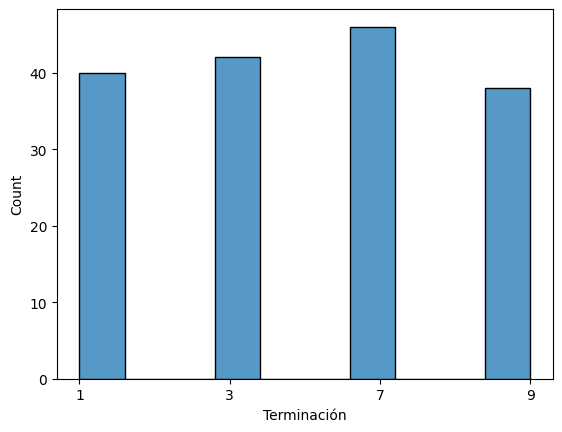

In [58]:
sns.histplot(data= datos, x="Terminación", weights="Cantidad", discrete=False)

Para los primeros 1000 números hay un total de 166 primos exceptuando el 2 y el 5, y parece que la terminación más común es el 7, pero quizá eso cambie con muestras más grandes

Veamos si encontramos alguna manera más interesante de visualizar los datos

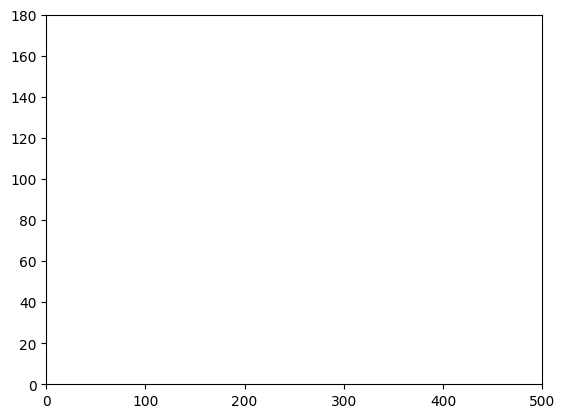

MovieWriter ffmpeg unavailable; using Pillow instead.


In [19]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np  # Missing import


def es_primo(n):
    if n < 2:
        return False
    for i in range(2, int(n**0.5) + 1):
        if n % i == 0:
            return False
    return True

n_primos = []
x_data, y_data = [], []

fig, ax = plt.subplots() # Haremos gráfico de línea
line, = ax.plot([], [], lw=2)

def init():
    ax.set_xlim(0, 1000) # Definimos el eje x (números primos hasta 500)
    ax.set_ylim(0, 180)  # Definimos el eje y (recuento de números primos)
    return line,

def update(frame):
    if es_primo(frame):
        n_primos.append(frame)
        x_data.append(frame)
        y_data.append(len(n_primos)) 
        line.set_data(x_data, y_data)
    return line,

# Creamos la animación
ani = FuncAnimation(fig, update, frames=np.arange(1, 1000), init_func=init, blit=True, interval=0.1, repeat=False) 
# ampliamos los frames para que la animacion sea más larga y reducimos interval para que sea más rápida

plt.show()

ani.save('prime_evolution.gif', writer='ffmpeg')

Veamos si se puede hacer algo similar con los dígitos finales

MovieWriter ffmpeg unavailable; using Pillow instead.


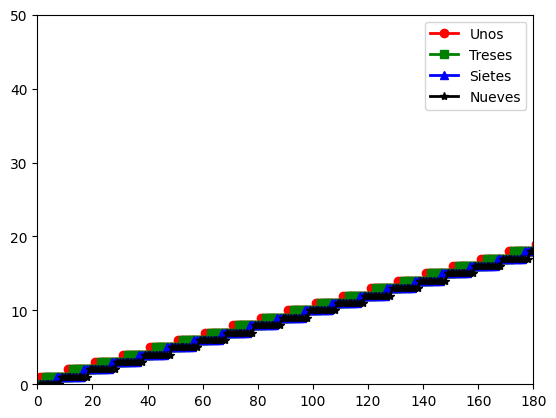

In [14]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

unos, treses, sietes, nueves = [], [], [], []
x_data, y_unos, y_treses, y_sietes, y_nueves = [], [], [], [], []

fig, ax = plt.subplots()
line_unos, = ax.plot([], [], 'ro-', lw=2, label='Unos')
line_treses, = ax.plot([], [], 'gs-', lw=2, label='Treses')
line_sietes, = ax.plot([], [], 'b^-', lw=2, label='Sietes')
line_nueves, = ax.plot([], [], 'k*-', lw=2, label='Nueves')

def init():
    ax.set_xlim(0, 400)  # Ajustamos el eje x (recuento de números primos)
    ax.set_ylim(0, 50)   # Ajustamos el eje y (recuento de números primos terminados en 1, 3, 7 y 9)
    ax.legend()
    return line_unos, line_treses, line_sietes, line_nueves

def update(frame):
    x_data.append(frame)
    last_digit = frame % 10
    if last_digit == 1:
        unos.append(frame)
    elif last_digit == 3:
        treses.append(frame)
    elif last_digit == 7:
        sietes.append(frame)
    elif last_digit == 9:
        nueves.append(frame)
    
    y_unos.append(len(unos))
    y_treses.append(len(treses))
    y_sietes.append(len(sietes))
    y_nueves.append(len(nueves))
    
    line_unos.set_data(x_data, y_unos)
    line_treses.set_data(x_data, y_treses)
    line_sietes.set_data(x_data, y_sietes)
    line_nueves.set_data(x_data, y_nueves)
    
    return line_unos, line_treses, line_sietes, line_nueves

# Creamos la animación
ani = FuncAnimation(fig, update, frames=np.arange(1, 1000), init_func=init, blit=True, interval=0.000000000001)
# ampliamos los frames para que la animacion sea más larga y reducimos interval para que sea más rápida

ani.save('prime_digits_evolution.gif', writer='ffmpeg')

Intentemos cambiar el tipo de gráfico

MovieWriter imagemagick unavailable; using Pillow instead.


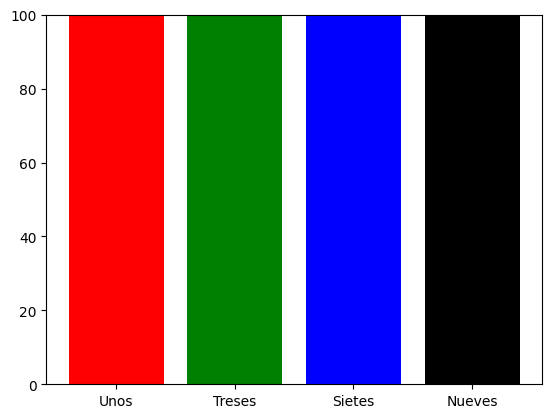

In [21]:
x_data = ['Unos', 'Treses', 'Sietes', 'Nueves'] # Definimos las terminaciones
y_data = [0, 0, 0, 0]  # Recuento de las terminaciones

fig, ax = plt.subplots()
bars = ax.bar(x_data, y_data, color=['red', 'green', 'blue', 'black'])

def init():
    ax.set_ylim(0, 100)  # Ajustamos el eje y (recuento de números primos terminados en 1, 3, 7 y 9)
    return bars

def update(frame):
    # Actualizamos según el último dígito de "frame"
    last_digit = frame % 10
    if last_digit == 1:
        y_data[0] += 1  # Unos
    elif last_digit == 3:
        y_data[1] += 1  # Treses
    elif last_digit == 7:
        y_data[2] += 1  # Sietes
    elif last_digit == 9:
        y_data[3] += 1  # Nueves
    
    # Actualizamos las alturas de las barras
    for bar, height in zip(bars, y_data):
        bar.set_height(height)
    
    return bars

# Creamos la animación
ani = FuncAnimation(fig, update, frames=np.arange(1, 1000), init_func=init, blit=False, interval=0.0001)
# ampliamos los frames para que la animacion sea más larga y reducimos interval para que sea más rápida

ani.save('prime_digits_evolution_bars.gif', writer='imagemagick')

En definitiva, los números primos dan mucho juego, y más de un dolor de cabeza a los matemáticos.